<a href="https://colab.research.google.com/github/ihagoSantos/machine_learning/blob/main/decision_tree_continuous_attributes_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dtreeviz
!pip install pydotplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

# Importação e particionamento da base de dados

In [3]:
# Importa base de dados
iris = datasets.load_iris() # Retorna dados no formato Bunch

X,y = iris.data, iris.target
class_names = iris.target_names

# Particionam base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)


In [4]:
# Converte Bunch retornado em dataframe
iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']],columns=np.append(iris['feature_names'], 'target'))
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


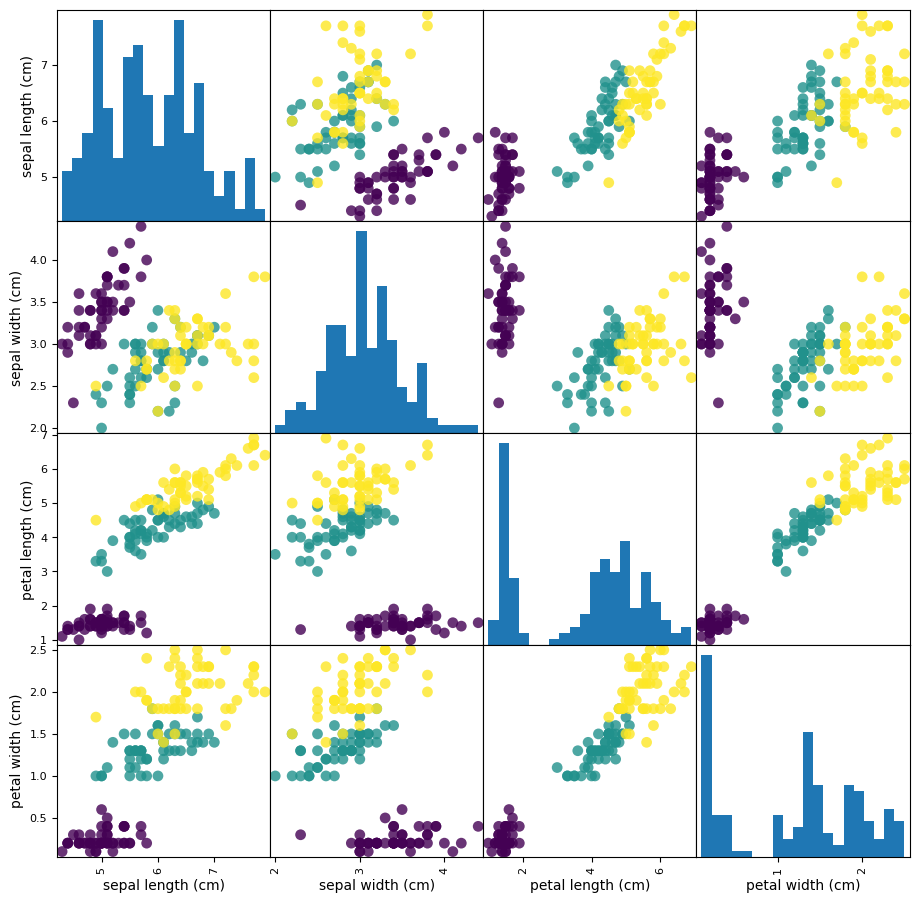

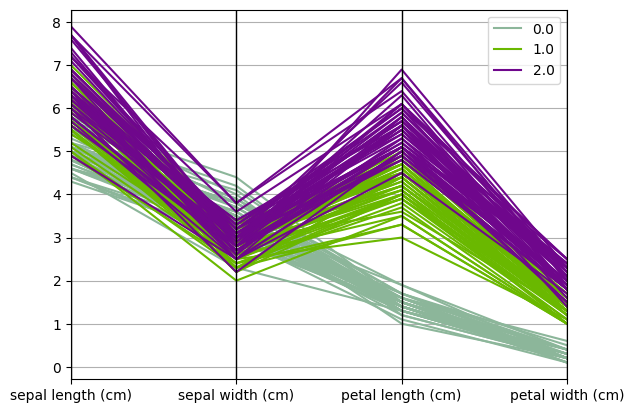

In [5]:
ax2 = pd.plotting.scatter_matrix(iris_dataframe.iloc[:, :4], figsize=(11,11), c=y, marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)
plt.figure()

ax3 = pd.plotting.parallel_coordinates(iris_dataframe, 'target')

# Indução do modelo
Os três passos para indução do modelo são:
1. Instanciar o modelo: DecisionTreeClassifier()
2. Treinar o modelo: fit()
3. Testar o modelo: predict()

In [6]:
tree_iris = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight={0:1, 1:1})
tree_iris = tree_iris.fit(X_train, y_train)
print("Acurácia: {0}".format(tree_iris.score(X_train, y_train)))

Acurácia: 1.0


In [7]:
y_pred = tree_iris.predict(X_test)
print("Acurácia da previsão: {0}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Acurácia da previsão: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [9]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=iris.target_names, columns=[x + "(prev)" for x in iris.target_names])
print(cnf_table)

            setosa(prev)  versicolor(prev)  virginica(prev)
setosa                 7                 0                0
versicolor             0                11                0
virginica              0                 0                5


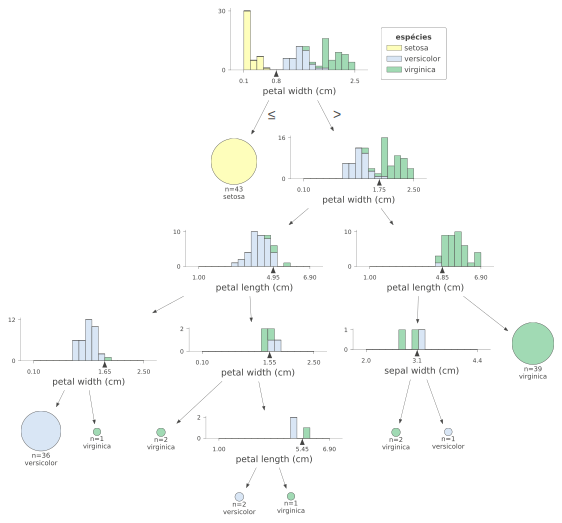

In [14]:
# from dtreeviz.trees import *
import dtreeviz

viz = dtreeviz.model(
    tree_iris,
    X_train,
    y_train,
    target_name='espécies',
    feature_names=iris.feature_names,
    class_names=['setosa', 'versicolor', 'virginica'],
)
viz.view()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.582\nsamples = 127\nvalue = [43, 39, 45]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 0.996\nsamples = 84\nvalue = [0, 39, 45]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.454\nsamples = 42\nvalue = [0, 38, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.461538461538461

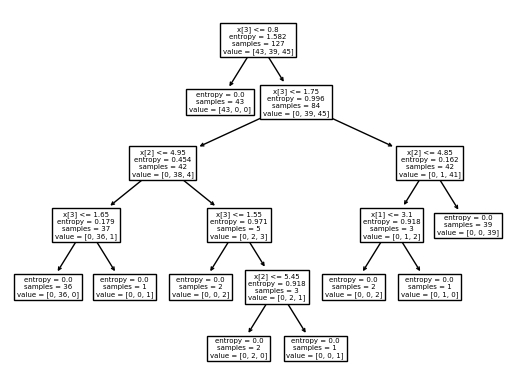

In [15]:
tree.plot_tree(tree_iris)

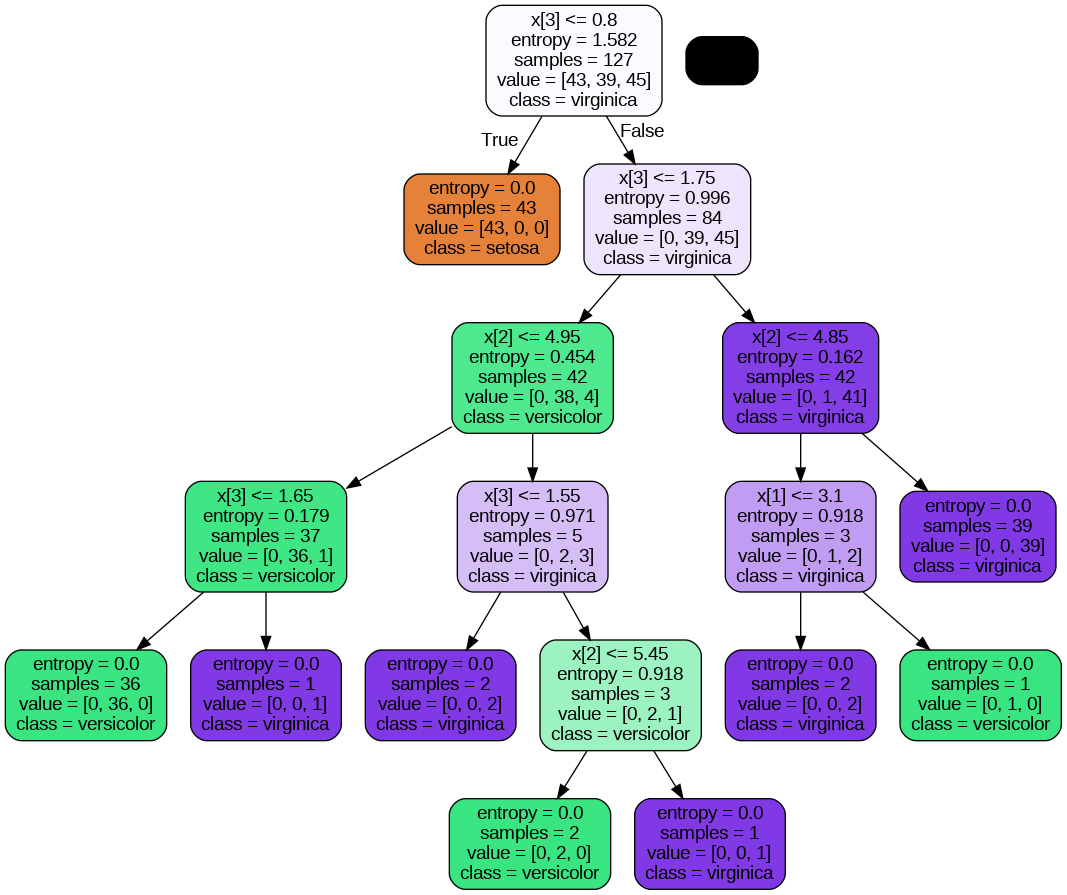

In [13]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    tree_iris,
    out_file=None,
    rounded=True,
    filled=True,
    class_names=['setosa', 'versicolor', 'virginica']
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())